In [1]:
import seaborn as sns
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from Plotting_essentials import *
from pre_processing import create_df
from Classfile import *


import os
from datetime import date

In [7]:
# load isochrones
#iso1_G, iso1_BP, iso1_RP = np.genfromtxt("/Users/alena/PycharmProjects/PaperI/data/PARSEC_isochrones/Bossini_DR2.txt",
#                                         usecols=(-3, -2, -1), unpack=True)
#iso2_G, iso2_BP2, iso2_BP, iso2_RP = np.genfromtxt(
#    "/Users/alena/PycharmProjects/PaperI/data/PARSEC_isochrones/Dias_DR2.txt",
#    usecols=(-4, -3, -2, -1), unpack=True)


Bossini_DR2 = np.genfromtxt("/Users/alena/PycharmProjects/PaperI/data/PARSEC_isochrones/Isochrones/Bossini_DR2.dat",
                                         usecols=(-3, -2, -1))
Bossini_EDR3 = np.genfromtxt("/Users/alena/PycharmProjects/PaperI/data/PARSEC_isochrones/Isochrones/Bossini_EDR3.dat",
                                         usecols=(-3, -2, -1))
Bossini_noAv = np.genfromtxt("/Users/alena/PycharmProjects/PaperI/data/PARSEC_isochrones/Isochrones/Bossini_DR2_noAv.dat",
                                         usecols=(-3, -2, -1))
Bossini_Apellaniz = np.genfromtxt("/Users/alena/PycharmProjects/PaperI/data/PARSEC_isochrones/Isochrones/Bossini_DR2_Apellaniz.dat",
                                         usecols=(-3, -2, -1))


Dias_DR2 = np.genfromtxt("/Users/alena/PycharmProjects/PaperI/data/PARSEC_isochrones/Isochrones/Dias_DR2.dat",
                                         usecols=(-3, -2, -1))
Dias_EDR3= np.genfromtxt("/Users/alena/PycharmProjects/PaperI/data/PARSEC_isochrones/Isochrones/Dias_EDR3.dat",
                                         usecols=(-3, -2, -1))
Dias_noZ= np.genfromtxt("/Users/alena/PycharmProjects/PaperI/data/PARSEC_isochrones/Isochrones/Dias_DR2_noZ.dat",
                                         usecols=(-3, -2, -1))
Dias_noZ_noAv= np.genfromtxt("/Users/alena/PycharmProjects/PaperI/data/PARSEC_isochrones/Isochrones/Dias_DR2_noZ_noAv.dat",
                                         usecols=(-3, -2, -1))
Dias_noAv= np.genfromtxt("/Users/alena/PycharmProjects/PaperI/data/PARSEC_isochrones/Isochrones/Dias_DR2_noAv.dat",
                                         usecols=(-3, -2, -1))
Dias_Evans = np.genfromtxt("/Users/alena/PycharmProjects/PaperI/data/PARSEC_isochrones/Isochrones/Dias_DR2_Evans.dat",
                                         usecols=(-3, -2, -1))


lst = [Bossini_DR2, Bossini_EDR3, Bossini_noAv, Bossini_Apellaniz]
labels = ["Dr2", "EDR3", "no_Av", "other_corr"]
lst_c = ['#99d8c9','#66c2a4','#2ca25f','#006d2c']
lst2 = [Dias_DR2, Dias_EDR3, Dias_noAv, Dias_noZ, Dias_noZ_noAv, Dias_Evans]
lst2_c =['#fdd49e','#fdbb84','#fc8d59','#ef6548','#d7301f','#990000']
labels2 = ["Dr2", "EDR3", "no_Av", "no_Z", "noz_noAv", "other_corr"]

In [3]:
# output paths
main = "/Users/alena/Library/CloudStorage/OneDrive-Personal/Work/PhD/Isochrone_Archive/Coding/"
subdir = date.today()
output_path = os.path.join(main, str(subdir))
try:
    os.mkdir(output_path)
except FileExistsError:
    pass
output_path = output_path + "/"

# Hyperparameter path
hypers = os.path.join(output_path, "hyperparams")
try:
    os.mkdir(hypers)
except FileExistsError:
    pass
hypers = hypers + "/"
preprocess = False
## Import data catalog and preprocess it
# Catalog selection
CI_raw = "/Users/alena/PycharmProjects/PaperI/data/PARSEC_isochrones/Pleiades_DR2_N1008.csv"

CI_cols = ["Cluster", "Plx", "Gmag", "BP-RP"]

CI_names = ["Cluster_id", "plx", "G_mag",  "BP_RP"]

CI_clusters, CI_df = create_df(CI_raw, CI_cols, CI_names)
sns.set_style("darkgrid")

Melotte_22       
1008


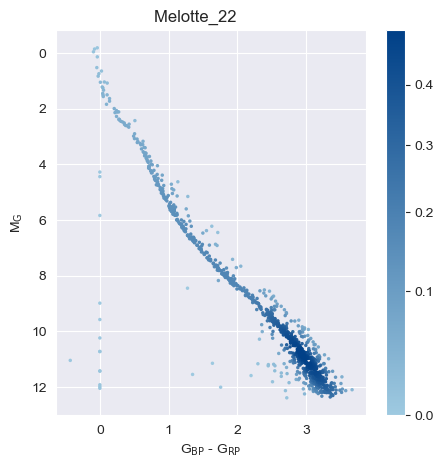

In [4]:
OC = star_cluster(CI_clusters[0], CI_df, errors=False, index_only=True)
print(OC.name)
f = CMD_density_design([OC.CMD[:,0], OC.CMD[:,1]], title = "{0}".format(OC.name), density_plot=True)
print(OC.Nstars)

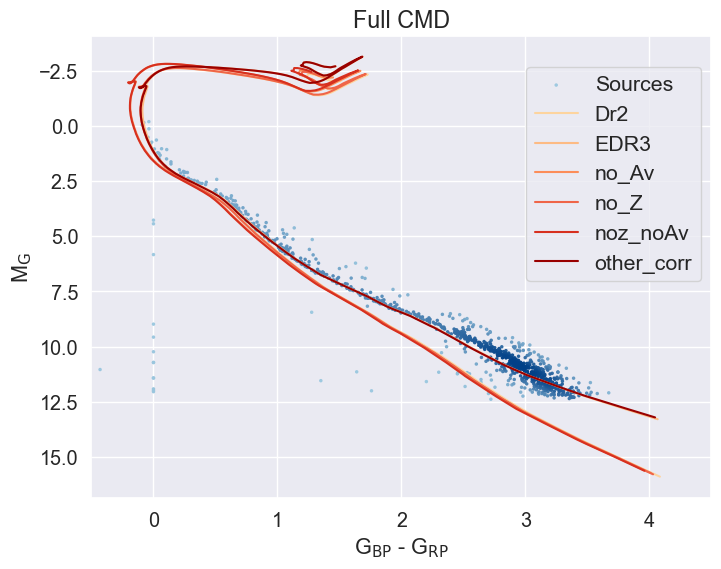

In [12]:
#plt.rcParams['pdf.fonttype'] = 42
#plt.rcParams['ps.fonttype'] = 42
#sns.set_style("darkgrid")

B = plt.figure(figsize=(8, 6))

ax1 = plt.subplot2grid((1, 1), (0, 0))#, rowspan=2)
#ax2 = plt.subplot2grid((2, 2), (0, 1))
#ax3 = plt.subplot2grid((2, 2), (1, 1))

plt.subplots_adjust(hspace=0.3)
sns.set(font_scale=1.4)

ax1.scatter(OC.density_x, OC.density_y, label="Sources", **OC.kwargs_CMD)
#or i,el in enumerate(lst):
#    ax1.plot(el[5:200,1] - el[5:200,2], el[5:200,0], label=labels[i], color = lst_c[i]) #c=(0.8807843137254902, 0.5509803921568628, 0.21654901960784312, 1.0),

for j,el2 in enumerate(lst2):
    ax1.plot(el2[5:200,1] - el2[5:200,2], el2[5:200,0],  label=labels2[j], color = lst2_c[j]) # c=(0.00596078431372549, 0.6954901960784314, 0.6644313725490196, 1.0),

ax1.set_xlabel(r"G$_{\rm BP}$ - G$_{\rm RP}$")
ax1.set_ylabel(r"M$_{\rm G}$")
ax1.legend(bbox_to_anchor = (1,0.7),loc="center right")
ymin,ymax = ax1.get_ylim()
ax1.set_ylim(ymax, ymin)
ax1.set_xlim(-0.5, 4.5)
ax1.set_title("Full CMD")
sns.set(font_scale=1.3)
'''
ax2.scatter(OC.density_x, OC.density_y, label="sources (Cantat-Gaudin+2020)", **OC.kwargs_CMD)
ax2.plot(iso1_BP[:200] - iso1_RP[:200], iso1_G[:200], color=(0.8807843137254902, 0.5509803921568628, 0.21654901960784312, 1.0),
         label=r"Bossini+2019  (86 Myr)")
ax2.plot(iso2_BP[:200] - iso2_RP[:200], iso2_G[:200], color=(0.00596078431372549, 0.6954901960784314, 0.6644313725490196, 1.0),         label=r"Dias isochrone")
ax2.set_ylim(4, ymin)
ax2.set_xlim(-0.5, 2.5)
ax2.set_title("Upper MS")
#ax2.set_xlabel(r"G$_{\rm BP}$ - G$_{\rm RP}$")
#ax3.margins(x=0, y=-0.25)
sns.set(font_scale=1.3)
ax3.scatter(OC.density_x, OC.density_y, label="sources", **OC.kwargs_CMD)
ax3.plot(iso1_BP[5:200] - iso1_RP[5:200], iso1_G[5:200], color=(0.8807843137254902, 0.5509803921568628, 0.21654901960784312, 1.0),
         label=r"Bossini isochrone")
ax3.plot(iso2_BP[5:200] - iso2_RP[5:200], iso2_G[5:200], color=(0.00596078431372549, 0.6954901960784314, 0.6644313725490196, 1.0),         label=r"Dias isochrone")
ax3.set_ylim(13.5, 7)
ax3.set_xlim(1.5, 4.3)
ax3.set_title("Lower MS")
ax3.set_xlabel(r"G$_{\rm BP}$ - G$_{\rm RP}$")
#ax3.margins(x=-0.25, y=-0.25)
'''

#B.show()
B.savefig(output_path+"Pleiades_age_comp_dias.pdf", dpi = 300)